# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).
5. Change the type of `effective_to_date` column to DateTime format.
6. Check `NaN` values per column.
7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
8. Drop any ID column.
9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df. 
11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 
12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
13. According to the previous histogram plots, do you think that you will have to apply any transformation?
14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [1]:
# 1. import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline



In [3]:
# 2. load data
URL = '/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/4.1_lab-cleaning-numerical-data/files_for_lab/customer_value_analysis.csv'
customer_df = pd.read_csv(URL)
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# 3. checking customer_df
display(customer_df.shape)
display(customer_df.index)
display(customer_df.columns)
display(customer_df.info())
display(customer_df.describe())

(9134, 24)

RangeIndex(start=0, stop=9134, step=1)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
cat_variables =  customer_df.select_dtypes('object')
cat_variables

for c in cat_variables.columns[1:]:
    display(cat_variables[c].value_counts())

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

Response
No     7826
Yes    1308
Name: count, dtype: int64

Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: count, dtype: int64

EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

Gender
F    4658
M    4476
Name: count, dtype: int64

Location Code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

Marital Status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

Policy Type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

Policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

Renew Offer Type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

Sales Channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

Vehicle Class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

Vehicle Size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

In [13]:
# 4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).
cols = []
for c in customer_df.columns:
    cols.append(str(c).lower().replace(' ', '_'))
customer_df.columns = cols

customer_df = customer_df.rename(columns = {'employmentstatus':'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [24]:
# 5. Change the type of `effective_to_date` column to DateTime format.
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')
customer_df.effective_to_date.unique()

<DatetimeArray>
['2011-02-24 00:00:00', '2011-01-31 00:00:00', '2011-02-19 00:00:00',
 '2011-01-20 00:00:00', '2011-02-03 00:00:00', '2011-01-25 00:00:00',
 '2011-01-18 00:00:00', '2011-01-26 00:00:00', '2011-02-17 00:00:00',
 '2011-02-21 00:00:00', '2011-01-06 00:00:00', '2011-02-06 00:00:00',
 '2011-01-10 00:00:00', '2011-01-17 00:00:00', '2011-01-05 00:00:00',
 '2011-02-27 00:00:00', '2011-01-14 00:00:00', '2011-01-21 00:00:00',
 '2011-02-05 00:00:00', '2011-01-29 00:00:00', '2011-02-28 00:00:00',
 '2011-02-12 00:00:00', '2011-02-02 00:00:00', '2011-02-07 00:00:00',
 '2011-01-22 00:00:00', '2011-02-13 00:00:00', '2011-01-15 00:00:00',
 '2011-01-08 00:00:00', '2011-01-11 00:00:00', '2011-01-28 00:00:00',
 '2011-02-08 00:00:00', '2011-02-23 00:00:00', '2011-01-02 00:00:00',
 '2011-02-16 00:00:00', '2011-01-27 00:00:00', '2011-01-23 00:00:00',
 '2011-01-09 00:00:00', '2011-02-11 00:00:00', '2011-02-04 00:00:00',
 '2011-02-01 00:00:00', '2011-02-15 00:00:00', '2011-02-26 00:00:00',
 '20

In [25]:
# 6. Check `NaN` values per column.
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [27]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [28]:
# 7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
def select_num_cat_variable_df (df: pd.DataFrame):
    df1 = df.copy()
    df1_num = df1.select_dtypes(np.number)
    df1_cat = df1.select_dtypes('object')
    return df1_num, df1_cat


In [29]:
customer_df_num, customer_df_cat = select_num_cat_variable_df(customer_df)
display(customer_df_cat)
display(customer_df_num)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [32]:
# 8. Drop any ID column.
customer_df_cat.drop(['customer'], axis = 1, inplace=True )
customer_df_cat

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [33]:
# 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
corr_matrix = customer_df_num.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


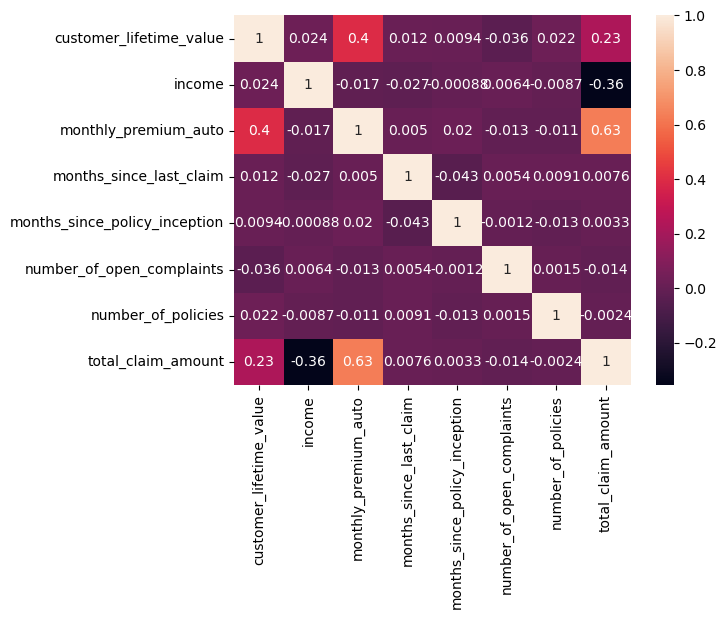

In [34]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# the pair with highest correlation values is monthly_premium_auto and total_claim_amount.
#  It makes totally sense, as the higher your monthly_premium subscription, the higher you get for you claim amount

In [47]:
for c in customer_df_num.columns:
    print(c, customer_df_num[c].nunique())#.shape

customer_lifetime_value 8041
income 5694
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
total_claim_amount 5106


In [44]:
# 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames:
# the first containing numerical continuous columns 
# and the second containing numerical discrete columns of the input dataframe.
# To this end, it might be helpful to count the number of unique values.
# The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns.
# Then, use it to create two new dataframes: continuous_df and discrete_df.

def split_continuous_discrete_df(df:pd.DataFrame, threshold:int = 36):
    continuous_cols = []
    discrete_cols = []
    for c in df.columns:
        if df[c].nunique() > threshold :
            continuous_cols.append(c)
        else:
            discrete_cols.append(c)
    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]
    return continuous_df, discrete_df

In [48]:
continuous_df, discrete_df = split_continuous_discrete_df(customer_df_num)
display(continuous_df)
display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [90]:
# 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 
def barplot_discrete (df):
    plot_cols = 2
    plot_rows = int(np.ceil(df.columns.shape[0]/2))
    fig, axs = plt.subplots(plot_rows, plot_cols, figsize = (16,16))
    axs = axs.flatten()
    for i, c in enumerate(df.columns):
        ax = axs[i]
        sns.countplot(df, x = c,  ax = ax)
        ax.set_title(c)
        ax.legend()
    plt.tight_layout()
    plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


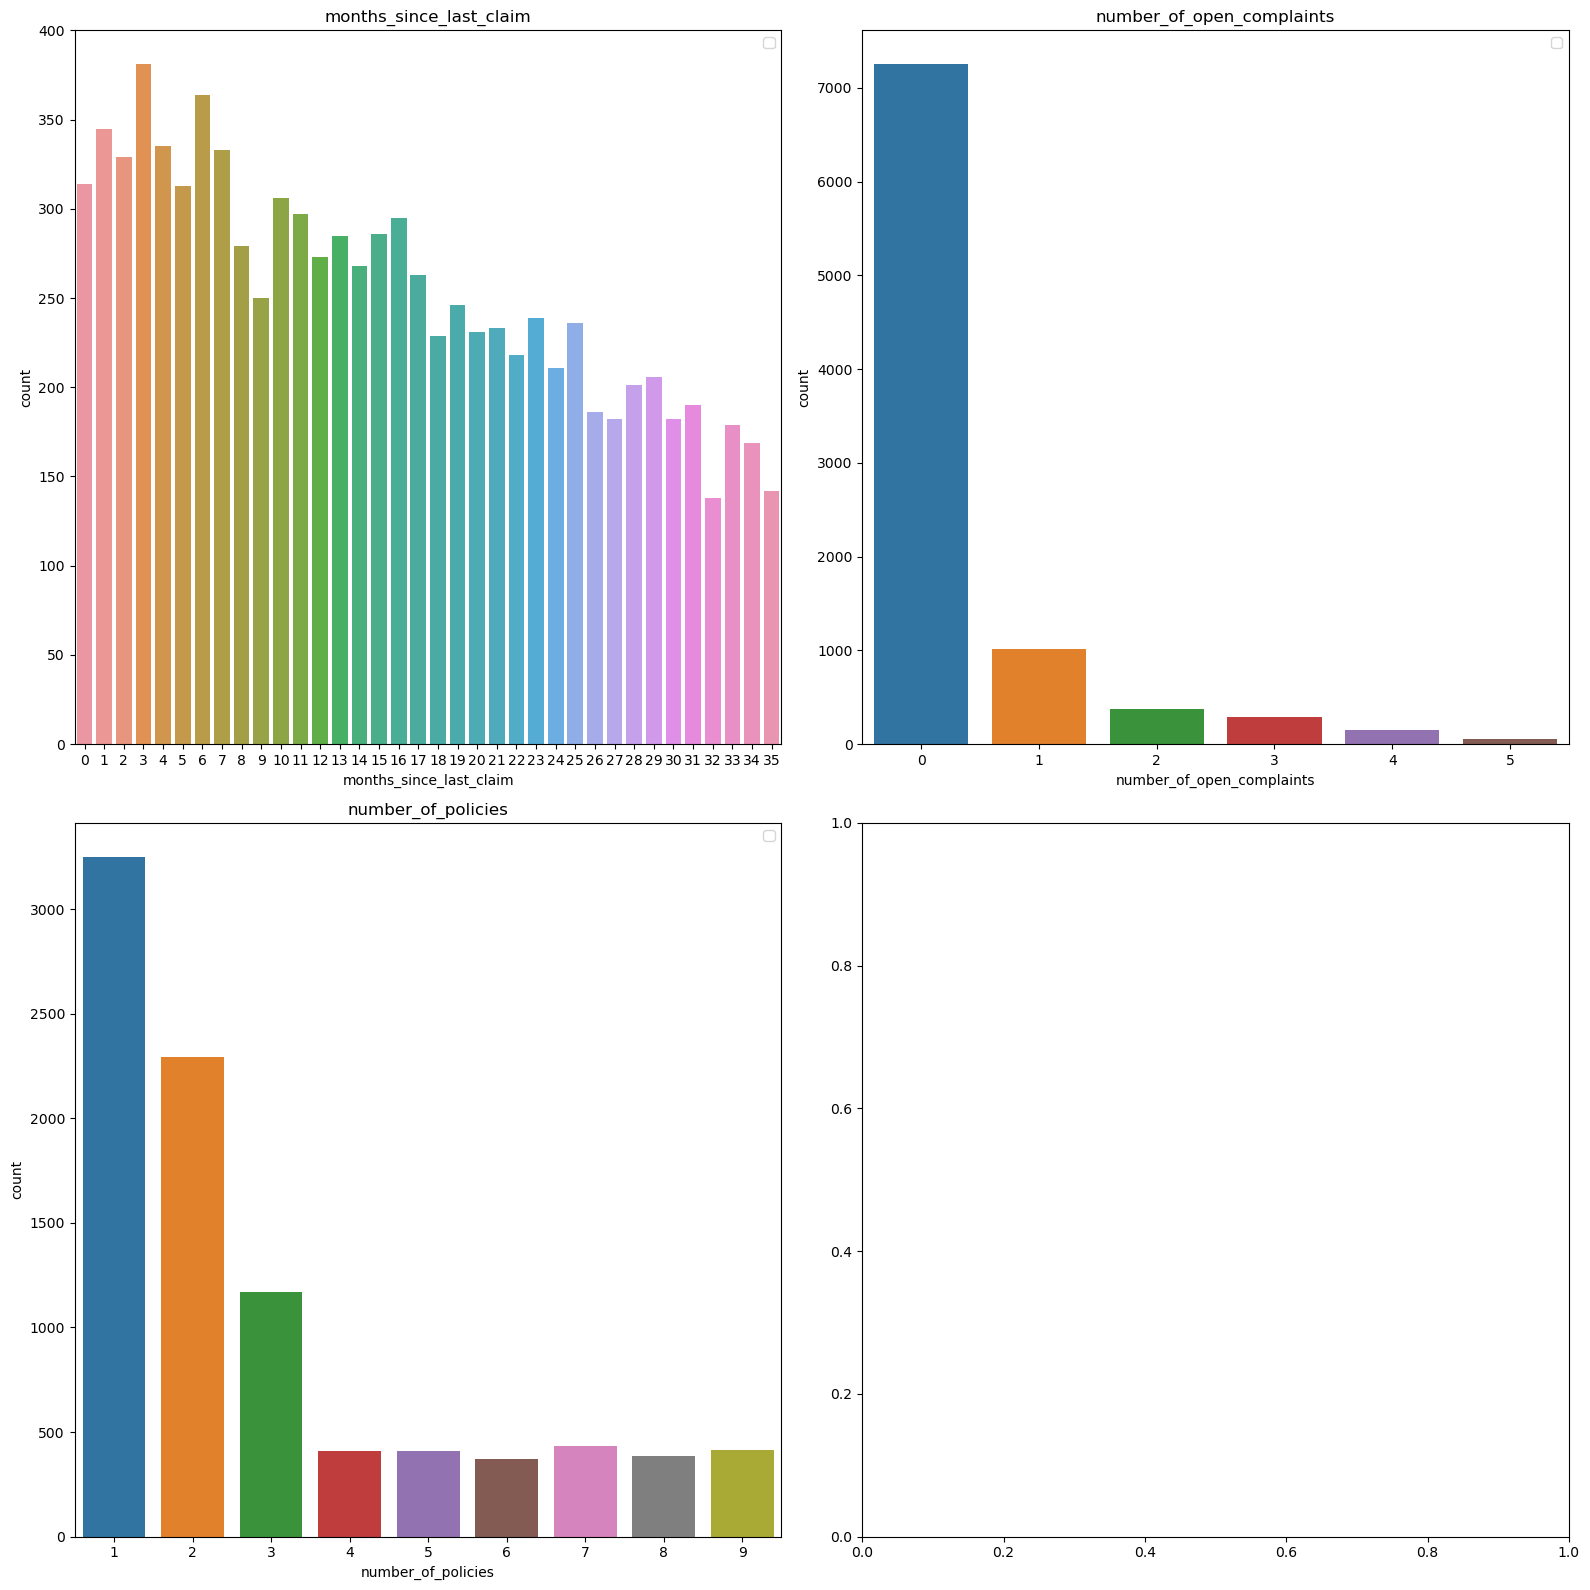

In [91]:
barplot_discrete(discrete_df)

In [88]:
# 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

def histogram_continuous(df):
    plot_cols = 2
    plot_rows = int(np.ceil(df.columns.shape[0]/2))
    fig, axs = plt.subplots(plot_rows, plot_cols, figsize = (16,16))
    axs = axs.flatten()
    for i, c in enumerate(df.columns):
        ax = axs[i]
        sns.histplot(df, x = c,  ax = ax)
        ax.set_title(c)
        ax.legend()
    plt.tight_layout()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


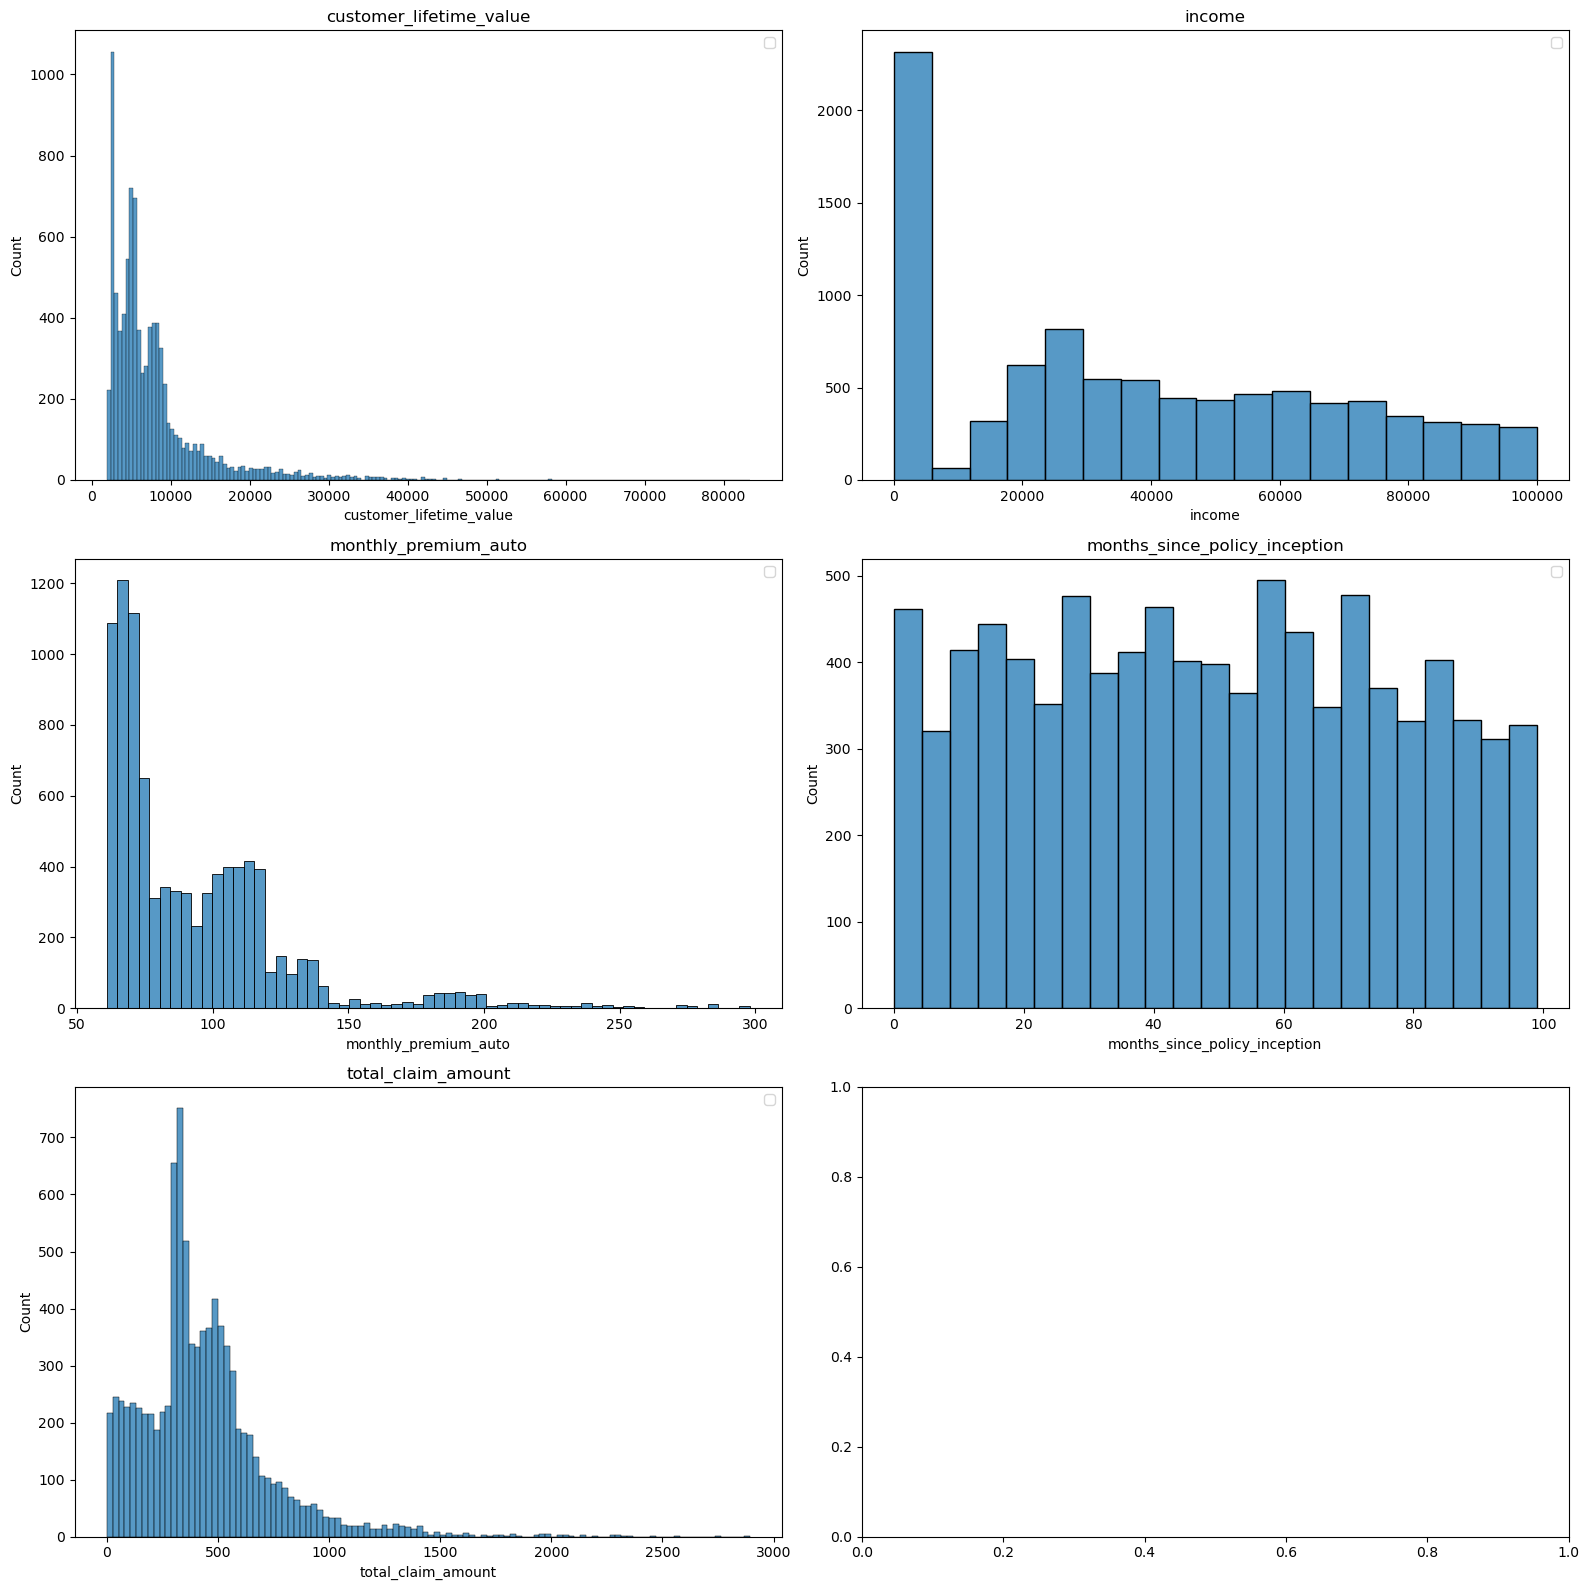

In [89]:
histogram_continuous(continuous_df)

In [93]:
# 13. According to the previous histogram plots, do you think that you will have to apply any transformation?
# YES

# checking for skewness:
for c in continuous_df.columns:
    print( c, 'skewness is: ', continuous_df[c].skew())

# Question: do I need to apply PowerTransformation here already? I think no, but check to be sure
# transformation:
# from sklearn.preprocessing import PowerTransformer


customer_lifetime_value skewness is:  3.0322802599299847
income skewness is:  0.28688727581189166
monthly_premium_auto skewness is:  2.1235464499475345
months_since_policy_inception skewness is:  0.040164961597799524
total_claim_amount skewness is:  1.7149658097209557


In [94]:
# 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.
def boxplot_continuous(df):
    plot_cols = 2
    plot_rows = int(np.ceil(df.columns.shape[0]/2))
    fig, axs = plt.subplots(plot_rows, plot_cols, figsize = (16,16))
    axs = axs.flatten()
    for i, c in enumerate(df.columns):
        ax = axs[i]
        sns.boxplot(df, x = c,  ax = ax)
        ax.set_title(c)
        ax.legend()
    plt.tight_layout()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


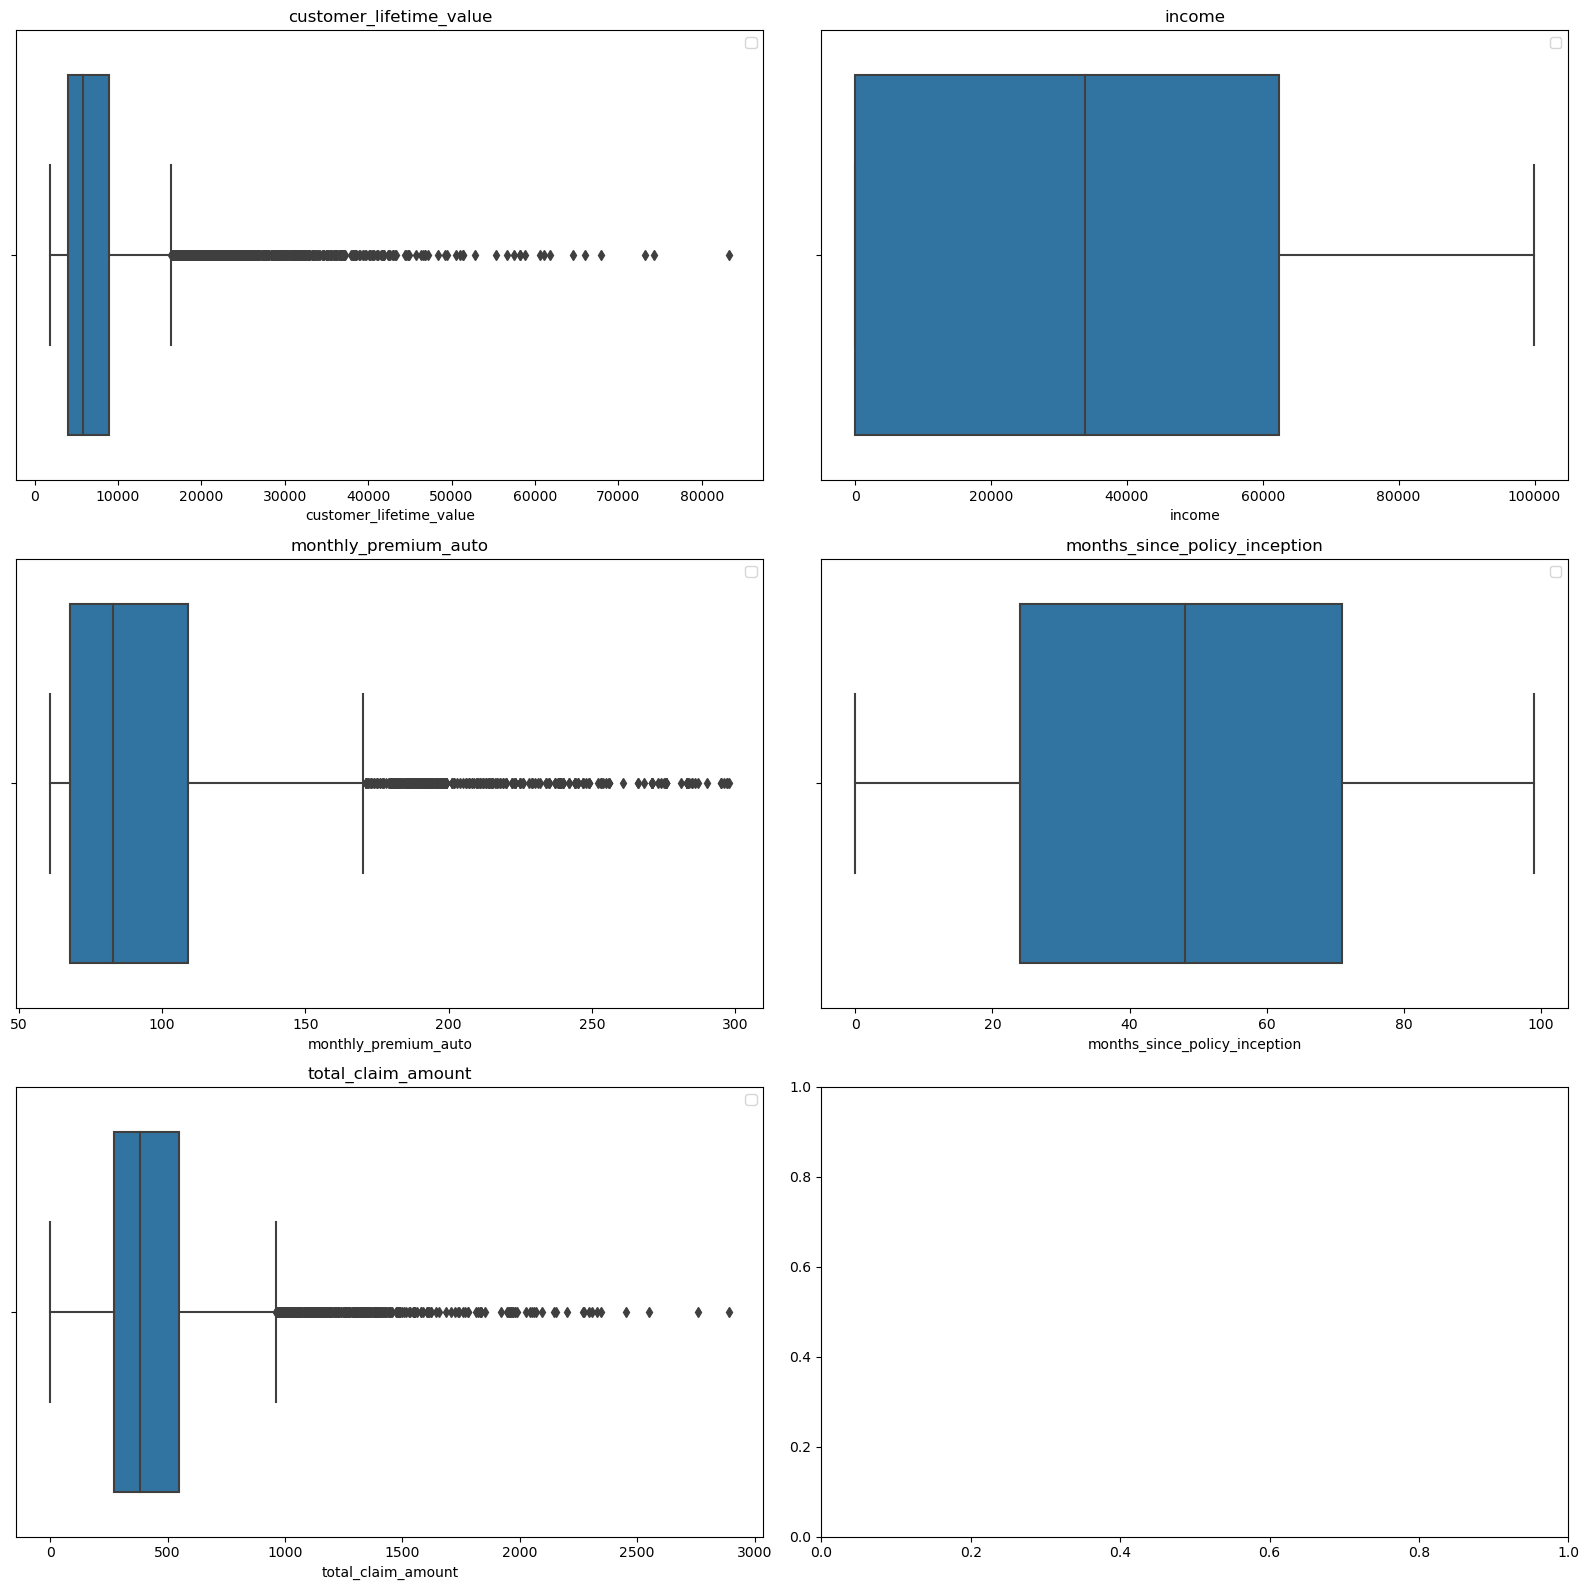

In [95]:
boxplot_continuous(continuous_df)